<a href="https://colab.research.google.com/github/KarrasYiannis/Trading/blob/main/Benchmark_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-22-af939f139df2>:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '96.70622195411529' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  portfolio.iloc[i] = portfolio.iloc[i-1] * (normalized_prices.iloc[i] / normalized_prices.iloc[i-1]).mean()
<ipython-input-22-af939f139df2>:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[97.94226583]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  benchmark_portfolio.iloc[i] = benchmark_portfolio.iloc[i-1] * (normalized_benchmark.iloc[i] / normalized_benchmark.iloc[i-1])


Performance Metrics for Your Portfolio:
Total Return: 4235.02%
Annualized Return (CAGR): 201.38%
Annualized Volatility: 57.68%
Sharpe Ratio: 349.16%
Max Drawdown: -1.44%

Performance Metrics for Benchmark (VUAA.MI):
Total Return: 6241.00%
Annualized Return (CAGR): 236.87%
Annualized Volatility: 60.63%
Sharpe Ratio: 390.66%
Max Drawdown: -0.85%


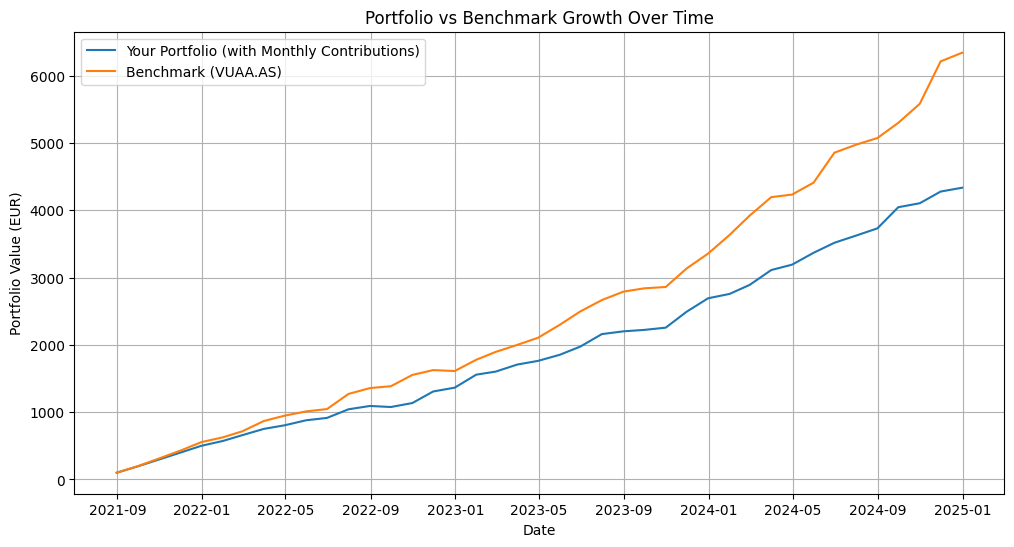

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define portfolio details
tickers = ['VUAA.MI', 'ICHN.AS', 'SEMI.AS', 'IPRP.AS', 'ECOM.AS', 'IBGX.AS', 'SGLN.L']#, 'COMS.AS']
allocations = [0.38, 0.15, 0.15, 0.15, 0.08, 0.03, 0.06]#, 0.04]  # Must sum to 1
benchmark_ticker = 'VUAA.MI'  # Using S&P 500 ETF as a benchmark

# Download historical data
start_date = '2021-08-01'
end_date = '2024-12-31'

prices = yf.download(tickers + [benchmark_ticker], start=start_date, end=end_date,auto_adjust=False)['Adj Close']
#prices = prices.dropna()

# Separate benchmark price
benchmark_price = yf.download(benchmark_ticker, start=start_date, end=end_date,auto_adjust=False)['Adj Close'].dropna()

# Resample to Monthly Prices (to simulate monthly investing)
monthly_prices = prices.resample('ME').last()
benchmark_monthly = benchmark_price.resample('ME').last()

# Normalize prices to 1 at the start
normalized_prices = monthly_prices / monthly_prices.iloc[0]
normalized_benchmark = benchmark_monthly / benchmark_monthly.iloc[0]

# Define monthly investment
monthly_investment = 100  # EUR 100 per month

# Initialize portfolio and benchmark
portfolio = pd.Series(0, index=normalized_prices.index)
benchmark_portfolio = pd.Series(0, index=normalized_benchmark.index)

# Simulate monthly contributions
for i in range(len(normalized_prices)):
    if i == 0:
        portfolio.iloc[i] = monthly_investment * sum(normalized_prices.iloc[i] * allocations)
        benchmark_portfolio.iloc[i] = monthly_investment * normalized_benchmark.iloc[i]
    else:
        portfolio.iloc[i] = portfolio.iloc[i-1] * (normalized_prices.iloc[i] / normalized_prices.iloc[i-1]).mean()
        portfolio.iloc[i] += monthly_investment * sum(normalized_prices.iloc[i] * allocations)

        benchmark_portfolio.iloc[i] = benchmark_portfolio.iloc[i-1] * (normalized_benchmark.iloc[i] / normalized_benchmark.iloc[i-1])
        benchmark_portfolio.iloc[i] += monthly_investment * normalized_benchmark.iloc[i]

# Calculate monthly returns
monthly_returns = portfolio.pct_change().dropna()
benchmark_returns = benchmark_portfolio.pct_change().dropna()

# Performance metrics
def calculate_performance_metrics(portfolio, returns):
    total_return = portfolio.iloc[-1] / portfolio.iloc[0] - 1
    annualized_return = (1 + total_return) ** (12 / len(portfolio)) - 1
    volatility = returns.std() * np.sqrt(12)
    sharpe_ratio = annualized_return / volatility
    cumulative_returns = (1 + returns).cumprod()
    running_max = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - running_max) / running_max
    max_drawdown = drawdowns.min()

    return {
        "Total Return": total_return,
        "Annualized Return (CAGR)": annualized_return,
        "Annualized Volatility": volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown
    }

metrics = calculate_performance_metrics(portfolio, monthly_returns)
benchmark_metrics = calculate_performance_metrics(benchmark_portfolio, benchmark_returns)

# Print results
print("Performance Metrics for Your Portfolio:")
for key, value in metrics.items():
    print(f"{key}: {value:.2%}")

print("\nPerformance Metrics for Benchmark (VUAA.MI):")
for key, value in benchmark_metrics.items():
    print(f"{key}: {value:.2%}")

# Plot the portfolio vs benchmark
plt.figure(figsize=(12,6))
plt.plot(portfolio.index, portfolio, label='Your Portfolio (with Monthly Contributions)')
plt.plot(benchmark_portfolio.index, benchmark_portfolio, label='Benchmark (VUAA.AS)')
plt.title('Portfolio vs Benchmark Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (EUR)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define portfolio details
tickers = ['VUAA.AS', 'ICHN.MI', 'SEMI.AS', 'IPRP.AS', 'ECOM.AS', 'IBGX.AS', 'SGLN.L', 'COMS.AS']
allocations = [0.38, 0.15, 0.15, 0.15, 0.08, 0.03, 0.02, 0.04]  # Must sum to 1
benchmark_ticker = 'VUAA.AS'  # Using S&P 500 ETF as a benchmark

# Download historical data
start_date = '2020-01-01'
end_date = '2024-12-31'

prices = yf.download(tickers + [benchmark_ticker], start=start_date, end=end_date)['Adj Close']
prices = prices.dropna()
prices

[*********************100%***********************]  8 of 8 completed
ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['ICHN.MI', 'COMS.AS', 'VUAA.AS']: YFTzMissingError('possibly delisted; no timezone found')


Ticker,COMS.AS,ICHN.MI,VUAA.AS
Date,,,


In [7]:
d = yf.download('VUAA.MI', start='2020-01-01',auto_adjust=False)
d

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VUAA.MI,VUAA.MI,VUAA.MI,VUAA.MI,VUAA.MI,VUAA.MI
Date,,,,,,
2020-01-02,58.071701,58.071701,58.071701,58.071701,58.071701,0
2020-01-03,57.666901,57.666901,57.666901,57.666901,57.666901,0
2020-01-06,57.870098,57.870098,57.870098,57.870098,57.870098,0
2020-01-07,57.712799,57.712799,57.712799,57.712799,57.712799,0
2020-01-08,57.998299,57.998299,57.998299,57.998299,57.998299,0
...,...,...,...,...,...,...
2025-04-17,88.779999,88.779999,89.699997,88.129997,89.320000,26055
2025-04-22,87.529999,87.529999,87.669998,86.150002,86.510002,27443
